# Practical Task 1: Supervised Learning

## Instructions:

1. Create a Jupyter notebook called insurance_regression.ipynb.
2. Import insurance.csv into your notebook.
3. Use the data in the relevant columns to determine how age affects insurance costs:
* Plot a scatter plot with age on the x-axis and charges on the y-axis.
* Using linear_model.LinearRegression() from sklearn, fit a model to your data, and make predictions on data.
* Plot another scatter plot with the best-fit line.

## My solution consists of two parts:
* <b>Solving Practical Task 1</b>: where I stick directly to the above instructions and fit a regression line to all data at once.
* <b>Extra credit</b>: where I first group data into three groups formed based on noticed patterns (no Machine Learning used here), and then I fit a regression line to each group separately.

# Solving Practical Task 1

In [41]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [42]:
# Importing insurance.csv, previously downloaded from the provided source into the Task folder
insurance = pd.read_csv("insurance.csv")

# Pre-viewing names of columns
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='charges'>

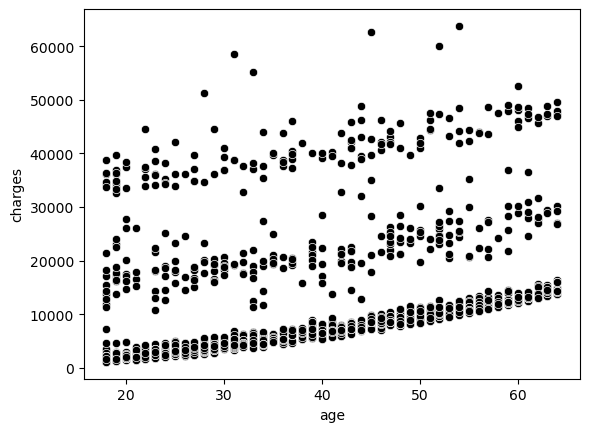

In [43]:
# Plot a scatter plot with age on the x-axis and charges on the y-axis
sns.scatterplot(data = insurance, x = 'age', y = 'charges', c = 'black')

<Axes: xlabel='age', ylabel='charges'>

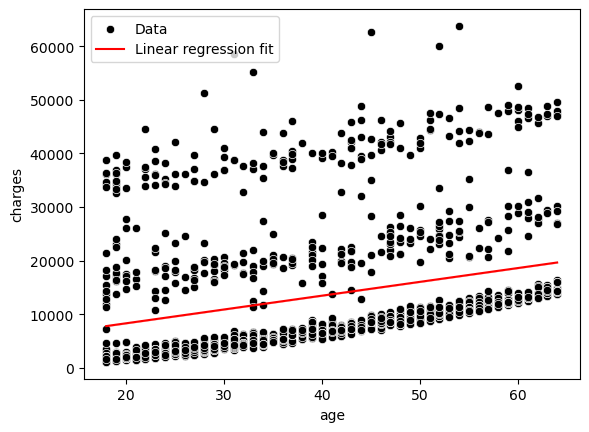

In [51]:
# Using linear_model.LinearRegression() from sklearn, fitting a model to data

# Preparing data set for fitting
X = insurance['age'].values.reshape(-1, 1) # create a 2D array
y = insurance['charges'].values

# Fitting linear regressin model to data
charges_model = LinearRegression() # Defining charges model as an object of the class LinearRegression
charges_model.fit(X, y)
y_pred = charges_model.predict(X)

# Plotting scatter plot with the best-fit line
sns.scatterplot(data = insurance, x = 'age', y = 'charges', c = 'black', label = 'Data')
sns.lineplot(x = X.flatten(), y = y_pred, c = 'r', label = 'Linear regression fit')

## Future prediction (age = 70)

At the age of 70, your charges are predicted to be: [21206.46831275].


<Axes: xlabel='age', ylabel='charges'>

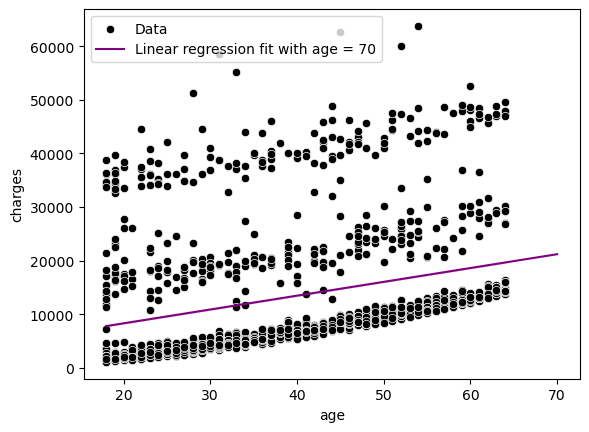

In [52]:
# Making predictions on data for age = 70
age_70 = [[70]]
charges_at_70 = charges_model.predict(age_70)

# Printing out prediction for age = 70
print(f"At the age of 70, your charges are predicted to be: {charges_at_70}.")

# Adding data for age = 70 to the linear regression fit 
x_pred_2 = np.append(X, age_70).reshape(-1,1)
y_pred_2 = charges_model.predict(x_pred_2)

# Plotting scatter plot with the best-fit line with prediction for age = 70
sns.scatterplot(data = insurance, x = 'age', y = 'charges', c = 'black', label = 'Data')
sns.lineplot(x = x_pred_2.flatten(), y = y_pred_2, c = 'purple', label = 'Linear regression fit with age = 70')

# Extra credit
It it noticible that charges form three distinct groups:
* low band: charges ranging from ~0 at age = 20 up to ~17,000 at age > 60
* middle band: charges ranging from ~10,000 at age = 20 up to ~35,000 at age > 60
* highest band: charges ranging from ~30,000 at age = 20 up to ~65,000 at age > 60

<p>
Let us then uncover the underlying grouping pattern and fit a separate regression line to each group.<br>
The most likely reasons for increasing insurance charges are smoking and obesity. Let us then explore how smoking and BMI influence charges.</p>

In [46]:
# Dividing all data into smokers and non-smokers
smokers = insurance[insurance['smoker'] == 'yes']
non_smokers = insurance[insurance['smoker'] == 'no']

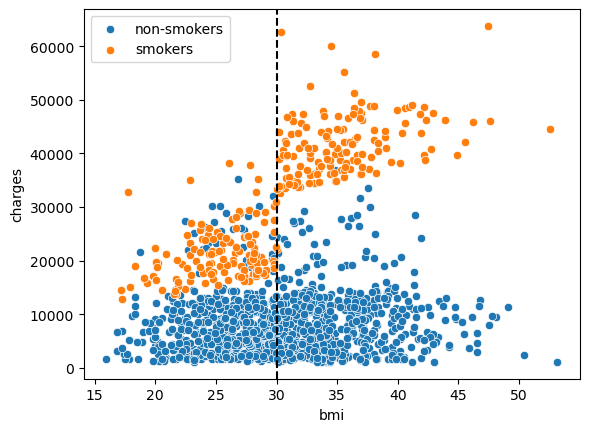

In [47]:
# Checking how BMI affects charges by plotting BMI vs. charges seprately for smokers and non-smokers
sns.scatterplot(data = non_smokers, x = 'bmi', y = 'charges', label = 'non-smokers')
sns.scatterplot(data = smokers, x = 'bmi', y = 'charges', label = 'smokers')
plt.axvline(x = 30, ls = '--', c = 'black')

The graph above clearly shows that the following three groups can be established and considered separately for linear regression fitting:

* non-smokers (low and middle band)
* smokers with bmi <= 30 (middle band)
* smokers with bmi > 30 (highest band)

Let us now do the regression analysis for each of these groups.

In [53]:
# Grouping smokers into thin (bmi <= 30) and fat (bmi > 30)

# Smokers with bmi <= 30:
smokers_thin = smokers[smokers['bmi'] <= 30]
# Smokers with bmi > 30:
smokers_fat = smokers[smokers['bmi'] > 30]

# Creating a dictionary assigning legend labels to the recognized groups
group_names = {
    'non-smokers': non_smokers,
    'smokers bmi<=30': smokers_thin, 
    'smokers bmi>30': smokers_fat
}

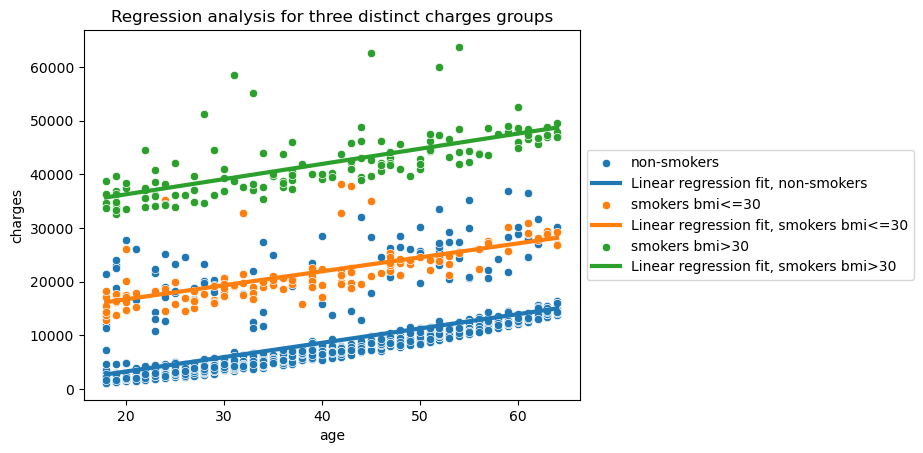

In [54]:
# Defining linear regression charges model
charges_model = LinearRegression()

# Creating one figure for plotting three charges groups
plt.figure()

# Iterating over three established groups to fit a regression line to each
for i in group_names:
# Obtaining group name from a dictionary    
    name = group_names[i]  
# Preparing data set for fitting
    X = name['age'].values.reshape(-1, 1) # create a 2D array
    y = name['charges'].values 
# Fitting linear regressin model to data
    charges_model.fit(X, y)
    y_pred = charges_model.predict(X) 
# Plot another scatter plot with the best-fit line
    sns.scatterplot(data = name, x = 'age', y = 'charges', label = i)
    sns.lineplot(x = X.flatten(), y = y_pred, lw = 3, label = 'Linear regression fit, '+i)
    
# Editing plot layout
plt.title('Regression analysis for three distinct charges groups')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

## Future prediction (age = 70)

At the age of 70 for non-smokers, charges are predicted to be: [16616.00334162].
At the age of 70 for smokers bmi<=30, charges are predicted to be: [29744.03806952].
At the age of 70 for smokers bmi>30, charges are predicted to be: [50440.60611345].


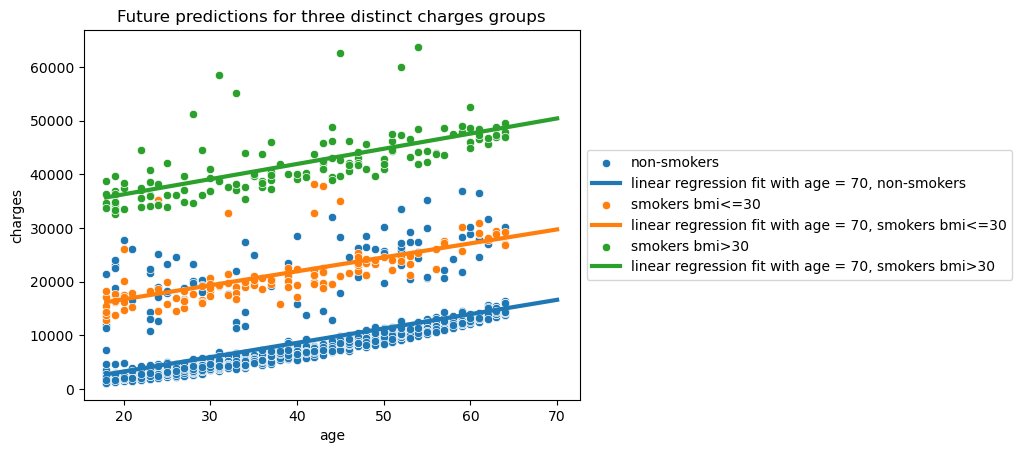

In [55]:
# Defining preditions for age = 70
age_70 = [[70]]

# Creating one figure for plotting three charges groups
plt.figure()

# Iterating over three established groups to fit a regression line to each
for i in group_names:
# Obtaining group name from a dictionary    
    name = group_names[i]
# Preparing data set for fitting
    X = name['age'].values.reshape(-1, 1) # create a 2D array
    y = name['charges'].values
# Fitting linear regressin model to data up to age = 70
    charges_model.fit(X, y)
# Adding data for age = 70 to the linear regression fit
    x_pred_2 = np.append(X, age_70).reshape(-1,1)
    y_pred_2 = charges_model.predict(x_pred_2)
    charges_at_70 = charges_model.predict(age_70)
# Plot another scatter plot with the best-fit line
    sns.scatterplot(data = name, x = 'age', y = 'charges', label = i)
    sns.lineplot(x=x_pred_2.flatten(), y=y_pred_2, lw = 3, label = 'linear regression fit with age = 70, '+i)
# Printing out prediction for age = 70
    print(f"At the age of 70 for {i}, charges are predicted to be: {charges_at_70}.")
    
# Editing plot layout
plt.title('Future predictions for three distinct charges groups')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()